In [ ]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [ ]:
import acquire
import prepare

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Modeling Exercises:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

____________________________

In [ ]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.head()

In [ ]:
#get value counts of survived (1) vs did not survive (0)
train.survived.value_counts()

### #1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [ ]:
#create the baseline
train["baseline"] = 0
baseline_accuracy = (train.survived == train.baseline).mean()
print(f'Baseline accuracy is: {baseline_accuracy:.2%}')

_________________________

### #2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [ ]:
#identify columns that you want to use

#only using the following columns
X_cols = ['pclass', 'fare', 'alone', 'Q', 'S']

#only trying to see who survived or died
y_col = 'survived'

In [ ]:
#split your data - train, validate, test

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [ ]:
#identify model 1 
model1 = DecisionTreeClassifier()

In [ ]:
#fit model 1 using train data
model1.fit(X_train, y_train)

In [ ]:
#get scores for train and validate, not using test yet
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

In [ ]:
#model 1 is the prediction
train['model1'] = model1.predict(X_train)
train.head()

_________________

### #3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
#model 1 score
# code == model1.score(X_train, y_train)
print(f'model1 score: {model1.score(X_train, y_train):.2%}')

In [ ]:
# confusion matrix
pd.crosstab(train.survived, train.model1)

In [ ]:
#classification report
print(classification_report(train.survived, train.model1, zero_division =True))

__________________

### #4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
#to get percentage, normalize=true
pd.crosstab(train.survived, train.model1, normalize=True)

positive- died (0)
<br>
negative - survived (1)

- **True positive** - 59.96%
- **False Postive** - 11.27% (predict they died, but they lived)
- **True Negative** - 25.96%
- **False Negative** - 1.81% (predict they lived, but they died)

In [ ]:
pd.DataFrame(classification_report(train.survived, train.model1, zero_division =True, output_dict=True))

In [ ]:
#Precision = TP / (TP+FP)
precision= 298 / (298+61)
precision

In [ ]:
#computer is using the (1- survived) as a positive
precision_score(train.survived, train.model1)

In [ ]:
#Recall = TP/ (TP+FN)
recall= 298/ (298+9)
recall

In [ ]:
#computer is using the (1- survived) as a positive
recall_score(train.survived, train.model1)

In [ ]:
#Accuracy = TP+TN/(TP +TN+FN+FP)
accuracy= (298+129) / (298+129+61+9)
accuracy

In [ ]:
accuracy_score(train.survived, train.model1)

In [ ]:
#OR make classification_report its own value
cr= pd.DataFrame(classification_report(train.survived, train.model1, zero_division =True, output_dict=True))

In [ ]:
#call classification variable- column 1
cr['0']

_________________________

### #5. Run through steps 2-4 using a different max_depth value.

In [ ]:
model2 = DecisionTreeClassifier(max_depth=1)
model2.fit(X_train, y_train)

plt.figure(figsize=(24,12))

plot_tree(model2, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])
plt.show()

In [ ]:
#max_depth = 1 score
# code == model2.score(X_train, y_train)
print(f'model2 score: {model2.score(X_train, y_train):.2%}')

##### Model 2 gives a score of 63.18% accuracy

In [ ]:
model3 = DecisionTreeClassifier(max_depth=3)
model3.fit(X_train, y_train)

plt.figure(figsize=(24,12))

plot_tree(model3, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])
plt.show()

In [ ]:
#max_depth = 3 score
# code == model3.score(X_train, y_train)
print(f'model3 score: {model3.score(X_train, y_train):.2%}')

##### Model 3 gives a score of 69.01% accuracy

____________________

### #6. Which model performs better on your in-sample data?

Model 1 (with default max_depth=0) did the best of all three models with an accuracy of 85.92%

___________________________

### #7 Which model performs best on your out-of-sample data, the validate set?

In [ ]:
model1.fit(X_validate, y_validate)

In [ ]:
print(f'model1 score: {model1.score(X_validate, y_validate):.2%}')

In [ ]:
model2.fit(X_validate, y_validate)

In [ ]:
print(f'model2 score: {model2.score(X_validate, y_validate):.2%}')

In [ ]:
model3.fit(X_validate, y_validate)

In [ ]:
print(f'model3 score: {model3.score(X_validate, y_validate):.2%}')

#### Model 3 has the highest accuracy in validate set

<hr style="border:2px solid blue"> </hr>

# Random Forest Exercises:

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.
<br>

2. Evaluate your results using the model score, confusion matrix, and classification report.
<br>

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
<br>

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.
<br>

5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [ ]:
from pydataset import data
from sklearn.model_selection import train_test_split
import pandas as pd
import acquire
import prepare

In [ ]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())

In [ ]:
#get to know data
train.shape, validate.shape, test.shape

In [ ]:
#only using the following columns
X_cols = ['pclass', 'fare', 'alone', 'Q', 'S']

#only trying to see who survived or died
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [ ]:
#look to see if we have nulls or columns to drop
train.info()

#data looks to be ready

In [ ]:
#take a look at X_train
X_train.head()

In [ ]:
y_train.head()

#### #1 Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [ ]:
#make our thing
clf= RandomForestClassifier(min_samples_leaf = 1, max_depth = 10, random_state= 123)

In [ ]:
#fit the thing (ONLY on train set!!)
clf.fit(X_train, y_train)

In [ ]:
#use the thing (on training set)
y_pred = clf.predict(X_train)

In [ ]:
#shows an array of y_predictions
#y_pred

#### #2 Evaluate your results using the model score, confusion matrix, and classification report.

In [ ]:
#model score
clf.score(X_train, y_train)

In [ ]:
#model score for validate set
clf.score(X_validate, y_validate)

In [ ]:
train['model5'] = clf.predict(X_train)
train.head()

In [ ]:
#confusion matrix- created manually with crosstab
pd.crosstab(train.survived, train.model5)

In [ ]:
#get percentage to answer question
pd.crosstab(train.survived, train.model5, normalize=True)

In [ ]:
#classification report
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

#### #3 Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
print(f'Random Forest Model 5 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 5 Precision score is: {precision_score(train.survived, train.model5):.2%}')
print(f'Random Forest Model 5 Recall score is: {recall_score(train.survived, train.model5):.2%}')
print(f'Random Forest Model 5 F1 score is: {f1_score(train.survived, train.model5):.2%}')


In [ ]:
#OR 
rf= pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))
rf['1']

- positive- died (1) 
- negative - survived (0)
<br>

- True positive - 27.57%
- False Postive - 10.66% (predict they lived, but they actually died)
- True Negative - 57.95%
- False Negative - 3.82% (predict they died, but they actually lived)

_________________________

#### #4 Run through steps increasing your min_samples_leaf and decreasing your max_depth

In [ ]:
#second RF model
clf= RandomForestClassifier(min_samples_leaf = 3, max_depth = 15, random_state= 123)

In [ ]:
#second RF model fit
clf.fit(X_train, y_train)

In [ ]:
#second RF model fit
y_pred = clf.predict(X_train)

In [ ]:
#second RF model train score
clf.score(X_train, y_train)

In [ ]:
#second RF model validate score
clf.score(X_validate, y_validate)

In [ ]:
#second RF model- insert column
train['model6'] = clf.predict(X_train)
train.head()

In [ ]:
#second RF model confusion matrix
pd.crosstab(train.survived, train.model6)

In [ ]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

In [ ]:
print(f'Random Forest Model 6 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 6 Precision score is: {precision_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 Recall score is: {recall_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 F1 score is: {f1_score(train.survived, train.model6):.2%}')

__________________________________

In [ ]:
#third RF model
clf= RandomForestClassifier(min_samples_leaf = 2, max_depth = 20, random_state= 123)

In [ ]:
#third RF model fit
clf.fit(X_train, y_train)

In [ ]:
#third RF model fit
y_pred = clf.predict(X_train)

In [ ]:
#second RF model train score
clf.score(X_train, y_train)

In [ ]:
#second RF model validate score
clf.score(X_validate, y_validate)

In [ ]:
#third RF model- insert column
train['model7'] = clf.predict(X_train)
train.head()

In [ ]:
#third RF model confusion matrix
pd.crosstab(train.survived, train.model7)

In [ ]:
print(f'Random Forest Model 6 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 6 Precision score is: {precision_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 Recall score is: {recall_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 F1 score is: {f1_score(train.survived, train.model6):.2%}')

In [ ]:
#third RF model
clf= RandomForestClassifier(min_samples_leaf = 1, max_depth = 13, random_state= 123)

In [ ]:
#third RF model fit
clf.fit(X_train, y_train)

In [ ]:
#third RF model fit
y_pred = clf.predict(X_train)

In [ ]:
#second RF model score train set
clf.score(X_train, y_train)

In [ ]:
#second RF model score with validate set
clf.score(X_validate, y_validate)

In [ ]:
#third RF model- insert column
train['model7'] = clf.predict(X_train)
train.head()

In [ ]:
#third RF model confusion matrix
pd.crosstab(train.survived, train.model7)

In [ ]:
print(f'Random Forest Model 7 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 7 Precision score is: {precision_score(train.survived, train.model7):.2%}')
print(f'Random Forest Model 7 Recall score is: {recall_score(train.survived, train.model7):.2%}')
print(f'Random Forest Model 7 F1 score is: {f1_score(train.survived, train.model7):.2%}')

________________________

#### #5 What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- Having run through multiple max_depth and min_sample_leaf:

    - it appears that max_depth=13 is the optimal level, any max_depth above that gives SAME score.
    - min_sample_leaf=1 (defaul) gives the optimal level, any min_sample_leaf above that, will give a lower score.
    
<br>

- clf= RandomForestClassifier(min_samples_leaf = 1, max_depth = 13, random_state= 123) <--- this gives highest score of **85.92%** accuracy in train set

- I would use Recall because we do not want to miss any positive cases

<hr style="border:2px solid blue"> </hr>

# KNN Exercise (May 24)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
import model_fun_cindy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

import acquire
import prepare

import warnings
warnings.filterwarnings('ignore')

Continue working in your model file with the titanic dataset.

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 2-4 setting k to 10

5. Run through setps 2-4 setting k to 20

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

7. Which model performs best on our out-of-sample data from validate?

### #1 Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [13]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,Q,S
583,0,1,male,36.000000,0,0,40.1250,First,Cherbourg,1,0,0
337,1,1,female,41.000000,0,0,134.5000,First,Cherbourg,1,0,0
50,0,3,male,7.000000,4,1,39.6875,Third,Southampton,0,0,1
218,1,1,female,32.000000,0,0,76.2917,First,Cherbourg,1,0,0
31,1,1,female,29.916875,1,0,146.5208,First,Cherbourg,0,0,0


In [15]:
#only using the following columns
X_cols = ['pclass', 'fare', 'alone', 'Q', 'S']

#only trying to see who survived or died
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

### #2 Evaluate your results using the model score, confusion matrix, and classification report.

In [16]:
#create the thing
knn = KNeighborsClassifier(n_neighbors=1)

#fit the thing
knn.fit(X_train, y_train)

#score the thing
knn.score(X_train, y_train)

0.8430583501006036

In [17]:
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'Model:{k}')
    print(f'training score: {knn.score(X_train, y_train):.2%}')
    print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
    print(f'accuracy score: {knn.score(X_test, y_test):.2%}')
    print ('________________________')

Model:1
training score: 84.31%
validate score: 68.22%
accuracy score: 60.67%
________________________
Model:2
training score: 80.48%
validate score: 68.22%
accuracy score: 62.92%
________________________
Model:3
training score: 79.88%
validate score: 70.09%
accuracy score: 57.87%
________________________
Model:4
training score: 77.06%
validate score: 69.16%
accuracy score: 60.11%
________________________
Model:5
training score: 77.46%
validate score: 70.09%
accuracy score: 62.36%
________________________
Model:6
training score: 74.45%
validate score: 66.82%
accuracy score: 63.48%
________________________
Model:7
training score: 75.05%
validate score: 67.76%
accuracy score: 64.61%
________________________
Model:8
training score: 74.25%
validate score: 68.22%
accuracy score: 65.17%
________________________
Model:9
training score: 74.85%
validate score: 70.56%
accuracy score: 66.85%
________________________
Model:10
training score: 74.25%
validate score: 71.50%
accuracy score: 66.85%
____

In [8]:
#this shows that K of 13 has best accuracy
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 60.67%
 2: 62.92%
 3: 57.87%
 4: 60.11%
 5: 62.36%
 6: 63.48%
 7: 64.61%
 8: 65.17%
 9: 66.85%
10: 66.85%
11: 66.85%
12: 65.73%
13: 67.42%
14: 66.29%
15: 66.85%
16: 65.17%
17: 66.29%
18: 65.17%
19: 65.73%


### #3 Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [9]:
#create the thing
knn = KNeighborsClassifier(n_neighbors=13)

#fit the thing
knn.fit(X_train, y_train)

#score the thing
knn.score(X_train, y_train)

0.738430583501006

In [10]:
model_fun_cindy.model_performs(X_train, y_train, knn)


    The accuracy for our model is 73.8431%
    The True Positive Rate is 55.263%,    The False Positive Rate is 14.658%,
    The True Negative Rate is 85.342%,    The False Negative Rate is 44.737%
    ________________________________________________________________________________
    

    The positive is  'survived'
    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 262,False positive: 45
actual_survived,False Negative: 85,True Positive: 105



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.755043,0.853420,0.801223,307.000000
survived,0.700000,0.552632,0.617647,190.000000
accuracy,0.738431,0.738431,0.738431,0.738431
macro avg,0.727522,0.703026,0.709435,497.000000
weighted avg,0.734001,0.738431,0.731043,497.000000


### #4 Run through steps 2-4 setting k to 10

In [22]:
#create the thing
knn2 = KNeighborsClassifier(n_neighbors=10)

#fit the thing
knn2.fit(X_train, y_train)

#score the thing
knn2.score(X_train, y_train)

0.7424547283702213

### #5 Run through steps 2-4 setting k to 20

In [23]:
#create the thing
knn3 = KNeighborsClassifier(n_neighbors=20)

#fit the thing
knn3.fit(X_train, y_train)

#score the thing
knn3.score(X_train, y_train)

0.6921529175050302

### #6 What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

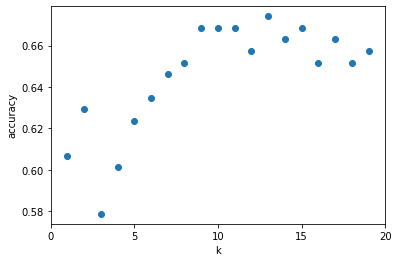

In [20]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

### #7 Which model performs best on our out-of-sample data from validate?

In [21]:
model_fun_cindy.model_performs(X_validate, y_validate, knn)


    The accuracy for our model is 67.2897%
    The True Positive Rate is 48.780%,    The False Positive Rate is 21.212%,
    The True Negative Rate is 78.788%,    The False Negative Rate is 51.220%
    ________________________________________________________________________________
    

    The positive is  'survived'
    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 104,False positive: 28
actual_survived,False Negative: 42,True Positive: 40



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.712329,0.787879,0.748201,132.000000
survived,0.588235,0.487805,0.533333,82.000000
accuracy,0.672897,0.672897,0.672897,0.672897
macro avg,0.650282,0.637842,0.640767,214.000000
weighted avg,0.664779,0.672897,0.665869,214.000000
